In [490]:
import pandas as pd
import matplotlib.pyplot as plt

In [491]:
# df = pd.read_csv("data/final_data_one_hot.csv")
# df.head(3)

In [492]:
df = pd.read_csv("data/final_data_min_lists.csv")
df.head(5)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,119.0,53.0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,115,2,334.0,676.0,903.0
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,490,5,58.0,201.0,279.0
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,53,1,514.0,573.0,1881.0
3,103.0,87.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1547,298,4292.0,4292.0,4292.0
4,100.0,66.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,824,1257,4292.0,4292.0,4292.0


# Normalize Data

In [493]:
from sklearn.preprocessing import MinMaxScaler

# Create and apply MinMaxScaler
scaler = MinMaxScaler()


df['runtime'] = df['runtime'].apply(int)
max_runtime = max(df['runtime'])

df['runtime'] = scaler.fit_transform(df[['runtime']])
df['directors'] = scaler.fit_transform(df[['directors']])
df['actors1'] = scaler.fit_transform(df[['actors1']])
df['actors2'] = scaler.fit_transform(df[['actors2']])
df['actors3'] = scaler.fit_transform(df[['actors3']])
df['production_company'] = scaler.fit_transform(df[['production_company']])
df.head(5)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,0.418972,53.0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0.073739,0.000786,0.077604,0.156913,0.207622
1,0.304348,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.316300,0.003142,0.013284,0.046165,0.061726
2,0.379447,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0.033635,0.000000,0.119553,0.132898,0.436287
3,0.355731,87.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.000000,0.233307,1.000000,1.000000,1.000000
4,0.343874,66.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.532342,0.986646,1.000000,1.000000,1.000000


# Expirement With Dropping Features

In [494]:
# df = df.drop(['runtime'], axis=1)

In [495]:
# df = df.drop(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'], axis=1)

# df = df.drop(['G', 'NC17', 'PG',], axis=1) # seems to be the most significantly average genres

In [496]:
# df = df.drop([
#   'Action & Adventure',
#   'Animation',
#   'Anime & Manga',
#   'Art House & International',
#   'Classics',
#   'Comedy',
#   'Cult Movies',
#   'Documentary',
#   'Drama',
#   'Faith & Spirituality',
#   'Gay & Lesbian',
#   'Horror',
#   'Kids & Family',
#   'Musical & Performing Arts',
#   'Mystery & Suspense',
#   'Romance',
#   'Science Fiction & Fantasy',
#   'Special Interest',
#   'Sports & Fitness',
#   'Television',
#   'Western'
# ], axis=1)


# df = df.drop([
#   'Action & Adventure',
#   'Animation',
#   'Art House & International',
#   'Classics',
#   'Drama',
#   'Gay & Lesbian',
#   'Kids & Family',
#   'Musical & Performing Arts',
#   'Romance',
#   'Television',
#   'Western'
# ], axis=1)

# df = df.drop([
#   'Anime & Manga',
#   'Comedy',
#   'Cult Movies',
#   'Documentary',
#   'Faith & Spirituality',
#   'Horror',
#   'Mystery & Suspense',
#   'Science Fiction & Fantasy',
#   'Special Interest',
#   'Sports & Fitness',
# ], axis=1)

Dropping only increased errors

# Train Models

In [497]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [498]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

### Linear Regression

In [499]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import ast
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mae)


13.215769349435826


### Logistic Regression

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

15.219322990126939


### Decision Tree

14.542313117066291


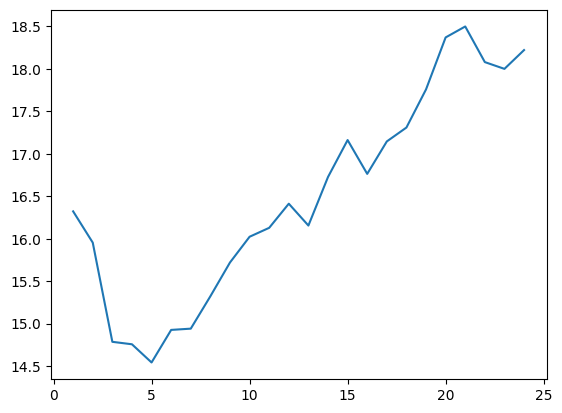

In [501]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

mae_errors = []
# accuracies = []
for d in range(1, 25):
  model = DecisionTreeClassifier(max_depth=d, random_state=69)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mae_errors.append(mae)

  # accuracy = accuracy_score(y_test, y_pred)
  # accuracies.append(accuracy)

print(min(mae_errors))
plt.plot(range(1, 25), mae_errors)
plt.show()
# plt.plot(range(1, 25), accuracies)
# plt.show()

### K-Nearest Neighbors

15.889985895627644


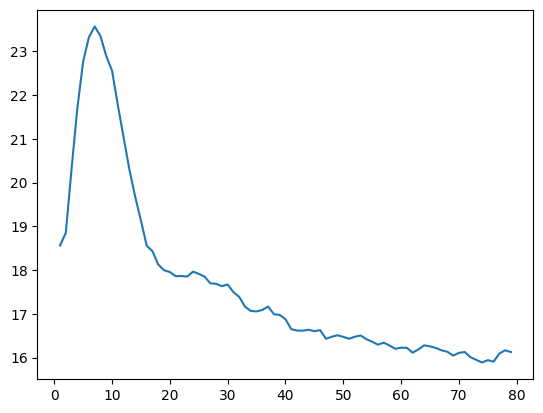

In [502]:
from sklearn.neighbors import KNeighborsClassifier

mae_errors = []
for k in range(1, 80):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  # mse = mean_squared_error(y_test, y_pred)
  # r2 = r2_score(y_test, y_pred)

  mae_errors.append(mae)

print(min(mae_errors))
plt.plot(range(1, 80), mae_errors)
plt.show()

### Distance Weighted KNN

16.475317348378


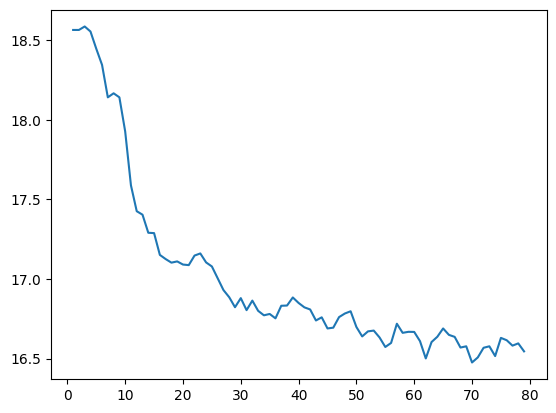

In [503]:
from sklearn.neighbors import KNeighborsClassifier

mae_errors = []
for k in range(1, 80):
  dwknn = KNeighborsClassifier(n_neighbors=k, weights='distance')

  dwknn.fit(X_train, y_train)

  y_pred = dwknn.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  # mse = mean_squared_error(y_test, y_pred)
  # r2 = r2_score(y_test, y_pred)

  mae_errors.append(mae)

print(min(mae_errors))
plt.plot(range(1, 80), mae_errors)
plt.show()

### Locally Weighted Linear Regression

In [504]:
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

class LocallyWeightedLinearRegression:
    def __init__(self, k=10):
        self.k = k
        self.model = LinearRegression()
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.neighbor_model = NearestNeighbors(n_neighbors=self.k).fit(self.X_train)
    
    def predict(self, X_test):
        predictions = []
        for _, row in X_test.iterrows():
            _, indices = self.neighbor_model.kneighbors([row])
            indices = indices.flatten()

            nearest_X = X_train.iloc[[i for i in indices]]
            nearest_Y = y_train.iloc[[i for i in indices]]
            
            lr = LinearRegression()
            lr.fit(nearest_X, nearest_Y)
            pred = lr.predict([row])

            predictions.append(pred)
        
        return np.array(predictions)

In [505]:
mae_errors = []
for k in [100, 300, 500, 700, 900]:
  lwlr = LocallyWeightedLinearRegression(k=k)
  lwlr.fit(X_train, y_train)
  y_pred = lwlr.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mae_errors.append(mae)

print(min(mae_errors))

13.04804024134965


Linear Regression has MAEs around 13-14

Logistic Regression has MAEs around 15

Decision Trees have MAEs around 14-15

KNN has MAEs around 16-17

Distance Weighted KNN has MAEs around 16-17

Locally Weighted Linear Regression performs around 12-14


Overall Linear Regression seems like the best model. Although Locally Weighted Linear Regression tends to do slightly better, the pay-off is not significant for the computational cost while at the same time it is also not an actual class supported by Scikit since we had to make our own.

# Try Custom Data

In [506]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [540]:
data = {
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG', # not final but likely
}

In [541]:
from encode_custom_data import encode_custom_data

new_data = encode_custom_data(data)

new_data

,runtime,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,Anime & Manga,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,0.391735,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0.181642,0.000785,0.014258,0.107492,0.258177


In [542]:
new_pred = lr.predict(new_data)
print(f'LR: {new_pred}')

LR: [56.7890625]
